In [1]:
import os
from q_learning_lab.port.environment import create_execute_environment
from logging import getLogger
from q_learning_lab.domain.q_learn import Agent

In [2]:
env = create_execute_environment(arena="frozen_lake")
assert env is not None

### Random walk testing

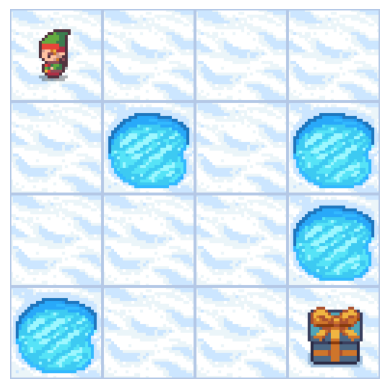

In [4]:
agent = Agent(is_verbose=True, learning_rate=0.1, discount_rate=0.9)
agent.random_walk(env, random_steps=10)

### train the agent

In [6]:
from q_learning_lab.domain.frozen_lake.models import Params
from pathlib import Path
params = Params(
            total_episodes=2000,
            n_max_steps=100,
            learning_rate=0.8, # learning rate alpha
            gamma=0.95, # discount rate
            epsilon=0.1,
            map_size=5,
            seed=123,
            is_slippery=False,
            n_runs=20,
            action_size=None,
            state_size=None,
            proba_frozen=0.9,
            savefig_folder=Path("_static/img/tutorials/"),
            start_epsilon=1.0,  # Starting exploration probability
            min_epsilon=0.05,  # Minimum exploration probability
            decay_rate=0.001,
        )
env = create_execute_environment(arena="frozen_lake")
assert env is not None
agent = Agent(
            learning_rate=params.learning_rate,
            discount_rate=params.gamma,
            is_verbose=False,
        )
qtable = agent.train(
            env=env,
            n_episodes=params.total_episodes,
            n_max_steps=params.n_max_steps,
            start_epsilon=params.start_epsilon,
            min_epsilon=params.min_epsilon,
            decay_rate=params.decay_rate,
        )

In [8]:
mean_reward, std_reward = agent.evaluate_agent(
            env=env, Qtable=qtable, n_eval_episodes=10, n_max_steps=100
        )

In [9]:
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

Mean_reward=1.00 +/- 0.00


### Visually run the agent here

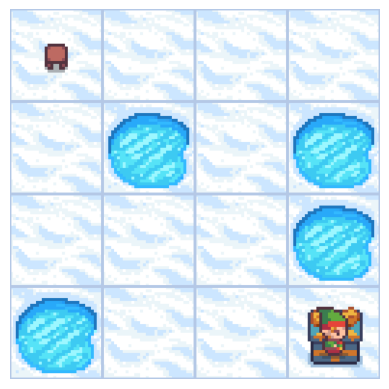

In [11]:
params = Params(
            total_episodes=2000,
            n_max_steps=19,
            learning_rate=0.8, # learning rate alpha
            gamma=0.95, # discount rate
            epsilon=0.1,
            map_size=5,
            seed=123,
            is_slippery=False,
            n_runs=20,
            action_size=None,
            state_size=None,
            proba_frozen=0.9,
            savefig_folder=Path("_static/img/tutorials/"),
            start_epsilon=1.0,  # Starting exploration probability
            min_epsilon=0.05,  # Minimum exploration probability
            decay_rate=0.001,
        )
agent_verbose = Agent(
            learning_rate=params.learning_rate,
            discount_rate=params.gamma,
            is_verbose=True,
        )
mean_reward, _ = agent_verbose.evaluate_agent(
            env=env, Qtable=qtable, n_eval_episodes=1, n_max_steps=19
        )